# Recordes Metereológicos de 2005 a 2014 vs 2015 - Região de Ann Arbor, Michigan

![chart](chart.png)

Vamos construir o gráfico mostrado acima!

#### Nota: essa é uma atividade do curso "[Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting)", da University of Michigan no Coursera.



Nele, temos dados de um subset da "The National Centers for Environmental Information" (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). Um GHCN-Daily é composto por registros climáticos diários de milhares de estações de superfície terrestre em todo o mundo.

Cada linha no dataset corresponde a uma única observação.


Temos essas variáveis:

* **id** : Código de identificação da estação
* **date** : data no formato YYYY-MM-DD (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicador do tipo do elemento
    * TMAX : Maximum temperature (em décimos de graus Celcius)
    * TMIN : Minimum temperature (em décimos de graus Celcius)
* **value** : Temperatura (em décimos de graus Celcius)


Para nossa tarefa, devemos:
1. Ler e nos familiarizar com o dataset, e então escrever um código python que retorne um grafíco de linhas que contenha os recordes de mínima e máxima temperaturas POR DIA do ano, no período de 2005-2014. A área entre o recorde máximo e mínimo deve estar sombreada.
2. Adicionar um scatterplot para cada ponto (máximo e minimo) em que o recorde de máxima e mínima de 2015 quebrou o recorde dos 10 anos anteriores (2005-2014).
3. Atentar para *leap days* como o famoso 29 de fevereiro. Então devemos removê-lo.
4. Fazer um gráfico bonito! Usando princípios de organização e não-poluição de legendas, labels, e sujeiras.

Os dados recebidos são de Ann Arbor, Michigan, United States.


## Primeiramente vamos ler o dataset e verificar seu shape, cabecalho e fim, e tipos de dados

In [197]:
# read csv
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.shape

(165085, 4)

In [198]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [199]:
df.sort_values(by='Date').tail()

,ID,Date,Element,Data_Value
45691,USC00200032,2015-12-31,TMAX,11
10573,USC00205050,2015-12-31,TMIN,-17
21088,USC00208202,2015-12-31,TMAX,0
10253,USC00201250,2015-12-31,TMIN,-6
29410,USC00200230,2015-12-31,TMIN,-17


In [200]:
df.sort_values(by='Date').head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [25]:
df.dtypes

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object

# Data Cleansing

Vamos primeiramente remover a coluna ID que não sera utilizada.

Converteremos o campo Date para datetime, ja q ele esta em object.

Logo, iremos separar o mes e dia, para podermos agrupar apenas pela data (dia-mes)

Por fim vamos converter as temperaturas de Décimo de Celcius para Celcius e remover 29 de fevereiro

In [201]:
# remover id
df.drop('ID', axis=1, inplace=True)

In [202]:
df['Date'] = pd.to_datetime(df['Date'])

# decimo celcius para celcius
df['Data_Value'] = df['Data_Value'] / 10

# separar ano do mes e dia, para podermos agrupar apenas pela data dia-mes
df['Year'], df['Month_date'] = df['Date'].dt.year, df['Date'].dt.strftime('%m-%d')

# remover feb
df = df[~df['Month_date'].str.contains("02-29")]
df.head()

,Date,Element,Data_Value,Year,Month_date
0,2014-11-12,TMAX,2.2,2014,11-12
1,2009-04-29,TMIN,5.6,2009,04-29
2,2008-05-26,TMAX,27.8,2008,05-26
3,2005-11-11,TMAX,13.9,2005,11-11
4,2014-02-27,TMAX,-10.6,2014,02-27


Não podemos esquecer de antes separar o ano de 2015.

In [203]:
# dataframe de 2015
df_15 = df[df['Date'] >= '2015']
df_15.head()

,Date,Element,Data_Value,Year,Month_date
19,2015-01-03,TMIN,-3.9,2015,01-03
30,2015-03-17,TMAX,18.9,2015,03-17
34,2015-06-06,TMIN,12.8,2015,06-06
46,2015-08-30,TMIN,17.8,2015,08-30
50,2015-08-30,TMIN,15.6,2015,08-30


## OK, agora vamos procurar pelos recordes metereológicos, por dia no periodo de 2005 a 2014

Existem vários registros sobre o mesmo dia, mes e ano, mas já que são registros de varias regiões isso é perfeitamente normal. Mas devemos atentar que devemos pegar o máximo ou mínimo daquele determinado dia, em 10 anos. 

Para um agrupamento disso, pois precisamos de uma classificação diária, precisamos extrair apenas os meses e dias do campo 'Date'.



In [204]:
# Dataframe de 2005 a 2014
df_ten_years = df[df['Year'] < 2015]

In [205]:
# verificar o final dos df dos 10 anos
df_ten_years.sort_values(by='Date').tail()

,Date,Element,Data_Value,Year,Month_date
47170,2014-12-31,TMIN,-12.2,2014,12-31
62752,2014-12-31,TMIN,-8.8,2014,12-31
46718,2014-12-31,TMAX,-3.9,2014,12-31
62784,2014-12-31,TMAX,-2.8,2014,12-31
46383,2014-12-31,TMAX,-5.6,2014,12-31


O campo 'Element' nos diz se é um valor mínimo (TMIN) ou máximo (TMAX). Se o valor for 'TMIN', devemos compará-lo com o menor mínimo, se for 'TMAX' devemos compará-lo com o maior máximo.

Podemos utilizar o método `group_by` para agrupar por 'Date' (e 'Element'), e verificar rapidamente os valores de 'Data_Value' com os métodos `min` e `max` para vermos os menores valores mínimos e maiores valores máximos de cada data.

In [206]:
# minimo das baixas temperaturas
(df_ten_years.groupby(['Month_date', 'Element']).min()).head(6)

Date  Data_Value  Year
Month_date Element                             
01-01      TMAX    2005-01-01        -9.3  2005
           TMIN    2005-01-01       -16.0  2005
01-02      TMAX    2005-01-02       -10.0  2005
           TMIN    2005-01-02       -26.7  2005
01-03      TMAX    2005-01-03       -11.7  2005
           TMIN    2005-01-03       -26.7  2005

In [207]:
# maximo das altas temperaturas
(df_ten_years.groupby(['Month_date', 'Element']).max()).head(6)

Date  Data_Value  Year
Month_date Element                             
01-01      TMAX    2014-01-01        15.6  2014
           TMIN    2014-01-01         7.2  2014
01-02      TMAX    2014-01-02        13.9  2014
           TMIN    2014-01-02         2.8  2014
01-03      TMAX    2014-01-03        13.3  2014
           TMIN    2014-01-03         2.8  2014

## Pegar os recordes

Ok, por ultimo, podemos agrupar por 'Date', selecionar apenas 'Data_Value'. Logo após, utilizamos o método de agregação ``agg`` utilizando os parametros min e max.

#### Recordes de 2005 a 2014

In [208]:
# agg por minimo e maximo
df_records = (df_ten_years.groupby(['Month_date'])['Data_Value']).agg([('Record Low', 'min'), ('Record High', 'max')])
df_records.head()

,Record Low,Record High
Month_date,,
01-01,-16.0,15.6
01-02,-26.7,13.9
01-03,-26.7,13.3
01-04,-26.1,10.6
01-05,-15.0,12.8


Assim temos a maior temperatura na regiao, de cada dia

In [209]:
df_records.shape

(365, 2)

#### Recordes de 2015

In [123]:
df_records_2015 = (df_15.groupby(['Month_date'])['Data_Value']).agg([('Record Low', 'min'), ('Record High', 'max')])
df_records_2015['Date'] = df_15['Date'].sort_values().unique() # mantendo a data pra utilizar como index posteriormente
df_records_2015.head()

,Record Low,Record High,Date
Month_date,,,
01-01,-13.3,1.1,2015-01-01
01-02,-12.2,3.9,2015-01-02
01-03,-6.7,3.9,2015-01-03
01-04,-8.8,4.4,2015-01-04
01-05,-15.5,2.8,2015-01-05


In [210]:
df_records_2015.shape

(365, 3)

## Recordes de 10 anos (2005 - 2014) que foram quebrados em 2015

In [212]:
# menores temperaturas registradas em 10 anos (2005 - 2014) quebradas em 2015
df_low_broken = df_records_2015[df_records_2015['Record Low'] < df_records['Record Low']].filter(['Record Low', 'Date'])
df_low_broken.head()

,Record Low,Date
Month_date,,
01-05,-15.5,2015-01-05
01-11,-20.0,2015-01-11
02-03,-23.8,2015-02-03
02-14,-23.9,2015-02-14
02-15,-26.0,2015-02-15


In [213]:
# maiores temperaturas registradas em 10 anos (2005 - 2014) quebradas em 2015
df_high_broken = df_records_2015[df_records_2015['Record High'] > df_records['Record High']].filter(['Record High', 'Date'])
df_high_broken.head()

,Record High,Date
Month_date,,
02-09,8.3,2015-02-09
04-17,27.8,2015-04-17
05-07,30.6,2015-05-07
05-08,33.3,2015-05-08
05-11,30.6,2015-05-11


# Data visualization

**Para visualizarmos os dados, devemos primeiramente definir a data de observação (ano de 2015)**

`date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')`

**Posteriormente criamos a figura e plotamos as linhas de máximas e mínimas**

`plt.plot(date_index,df_records['Record High'], color='lightcoral', linewidth=2.5)`

`plt.plot(date_index,df_records['Record Low'], color='skyblue', linewidth=2.5)`

**Entao plotamos um scatterplot dos recordes que 2015 quebrou**

É necessária conversar para datetime, das datas do dataframe dos recordes quebrados, para estarem na mesma dimensão do espaço de visualização criado em `date_index`

Serão plotados triangulos para mostrar recordes de máxima, e triangulos invertidos para recordes de mínima.

```plt.plot(list(map(pd.to_datetime, df_high_broken['Date'])), df_high_broken['Record High'], 'r^',
        list(map(pd.to_datetime, df_low_broken['Date'])), df_low_broken['Record Low'], 'cv', ms=8, alpha=1)```
      
**Linha horizontal para salientar 0 graus**

``plt.axhline(linewidth=0.5, color='b', alpha=0.5)``

**Definimos os limites de x e y**

Dessa maneira, o gráfico fica sem espaços em branco com relação as bordas.

``ax.axis(['2015/01/01','2015/12/31',-50,50])``

**Renomear os ticks**

``ax.set_xticklabels(('jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'),fontsize=16)
ax.set_yticklabels(('50 $^{\circ}$C', '40 $^{\circ}$C', '20 $^{\circ}$C', 
                    '0 $^{\circ}$C', '-20 $^{\circ}$C', '-40 $^{\circ}$C', '-50 $^{\circ}$C'), fontsize=16)``

**Sombrear a área entre eles**

``ax.fill_between(date_index, df_records['Record High'], df_records['Record Low'], facecolor='grey', alpha=0.3)``

**Por fim adicionar titulo e legenda**

``plt.title()
plt.legend()``

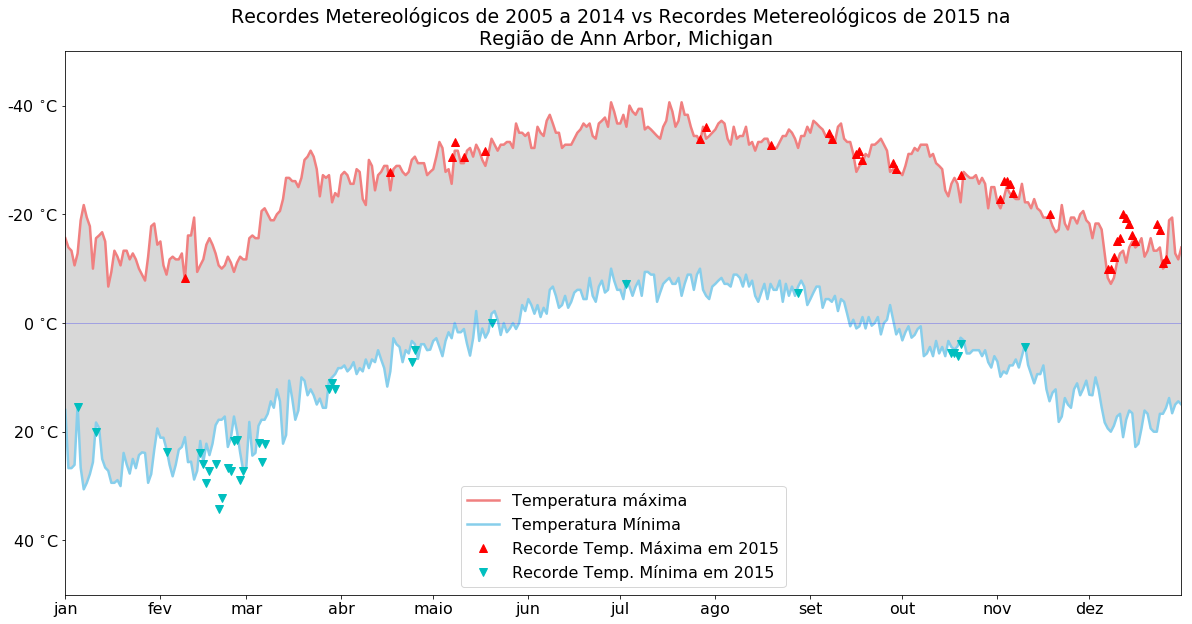

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


# range para visualização
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')
date_index = list(map(pd.to_datetime, date_index)) # conversao para lista
plt.figure(figsize=(20, 10)) # criacao da figura que sera desenhado o grafico

# plot maximas
plt.plot(date_index,df_records['Record High'], color='lightcoral', linewidth=2.5)

# plot minimas
plt.plot(date_index,df_records['Record Low'], color='skyblue', linewidth=2.5)

#2015 recordes
plt.plot(list(map(pd.to_datetime, df_high_broken['Date'])), df_high_broken['Record High'], 'r^',
        list(map(pd.to_datetime, df_low_broken['Date'])), df_low_broken['Record Low'], 'cv', ms=8, alpha=1)

# linha horizontal na temperatura 0
plt.axhline(linewidth=0.5, color='b', alpha=0.5)

# limites de x e y
ax = plt.gca() # pegando os eixos atuais (get current axes)
ax.axis(['2015/01/01','2015/12/31',-50,50])

# renomeando os ticks
ax.set_xticklabels(('jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'),fontsize=16)
ax.set_yticklabels(('50 $^{\circ}$C', '40 $^{\circ}$C', '20 $^{\circ}$C', 
                    '0 $^{\circ}$C', '-20 $^{\circ}$C', '-40 $^{\circ}$C', '-50 $^{\circ}$C'), fontsize=16)

# pintar a diferença entre as linhas
ax.fill_between(date_index, df_records['Record High'], df_records['Record Low'], facecolor='grey', alpha=0.3)

# Adicionar titulo
plt.title("Recordes Metereológicos de 2005 a 2014 vs Recordes Metereológicos de 2015 na \n Região de Ann Arbor, Michigan", fontsize=19)

# Adicionar legenda
plt.legend(['Temperatura máxima', 'Temperatura Mínima', "Recorde Temp. Máxima em 2015", "Recorde Temp. Mínima em 2015"], loc='lower center', prop={'size':16})
